# **CAREER ACCELERATOR PROJECT 2**

### **A MACHINE LEARNING, BINARY CLASSIFICATION PROJECT**

## **1. BUSINESS UNDERSTANDING**

### **Project Overview:**
The goal of this data project is to create a machine learning model that predicts customer churn for Vodafone Group. Customer churn refers to the phenomenon where customers stop using a service or product. In the context of Vodafone, it means customers leaving their mobile or telecom services.

### **Business Context:**
Vodafone Group is a global telecommunications company with millions of customers worldwide. Retaining existing customers is crucial for their business success. By predicting customer churn, Vodafone can take proactive measures to retain high-risk customers and improve overall customer satisfaction.

### **Why is predicting churn important?**
Churn prediction helps Vodafone identify customers who are likely to leave the service. By addressing their concerns or offering incentives, Vodafone can reduce churn rates and improve customer retention.

### **What data is available?**
Vodafone has access to historical customer data, including demographics, usage patterns, billing information, additional services, and more. 
The available data has the following columns.

| **Column** | **Description** |
|--------|--------------------------------------------|
| Gender | Whether the customer is a male or a female |
| SeniorCitizen | Whether a customer is a senior citizen or not |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| Tenure | Number of months the customer has stayed with the company |
| Phone Service | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not |
| InternetService | Customer's internet service provider (DSL, Fiber Optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No Internet) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No Internet) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No Internet service) |
| Contract | The contract term of the customer (Month-to-Month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| Payment Method | The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |
| Churn | Whether the customer churned or not (Yes or No) |

### **Relevant features may include:**
1. Customer demographics (age, gender, etc.)
2. Usage metrics (Phone Service, Multiple Lines, etc.)
3. Billing information (monthly charges, contract type etc.)
4. Additional service interactions (Internet service, Streaming services, etc.)

### **What are the business objectives?**
1. Reduce customer churn by identifying high-risk customers early.
2. Optimize marketing efforts by targeting specific customer segments.
3. Improve customer satisfaction and loyalty.

### **How will the model be used?**
The churn prediction model will be integrated into Vodafone’s customer management system.
It will generate alerts for high-risk customers, allowing customer service representatives to take proactive actions (e.g., personalized offers, retention campaigns).

### **What are the success criteria?**
The success of the project will be evaluated based on:
* Correctly predicting churn (Model Accuracy of at least 70%)

### **Approach:**
1. Data Collection and Exploration:
    * Gather historical customer data from various sources.
    * Explore the data to understand its quality, completeness, and relevance.
2. Feature Engineering:
    * Create relevant features from the available data.
    * Examples: churn history, customer tenure, usage patterns, billing metrics.
3. Model Selection:
    * Choose appropriate machine learning algorithms (e.g., logistic regression, random forests).
    * Evaluate models based on performance metrics (accuracy, precision, recall).
4. Model Training and Validation:
    * Split the data to train and test data
    * Train the model on historical data.
    * Validate the model’s performance using unseen data.

### **Hypotheses:**
1. `Null Hypothesis (H0)`: Customer tenure does not significantly impact churn.\
    `Alternative Hypothesis (H1)`: Customer tenure significantly affects churn.

2. `Null Hypothesis (H0)`: Additional Service Interactions have no effect on churn.\
    `Alternative Hypothesis (H1)`: Additional Service Interactions influence churn.

3. `Null Hypothesis (H0)`: Billing and payment is unrelated to churn.\
    `Alternative Hypothesis (H1)`: Billing and payment matters in predicting churn.

### **Analytical Questions:**
1. What are the top 3 features that have strong correlation to churn?
2. How does the presence of online security, backup, and tech support affect churn?
3. What was the financial impact of customer churn on Vodafone's revenue?
4. What are the prevalent contract types and payment methods among customers exhibiting churn behavior?
5. How does the distribution of tenure differ between churned and retained customers?
6. Is there a correlation between churn and specific internet service types (e.g., fiber vs. DSL)?
7. How do different payment methods (e.g., electronic check, credit card) correlate with churn?

### **Conclusion:**
Predicting customer churn is essential for Vodafone’s business strategy. By leveraging machine learning, Vodafone can proactively address customer needs, reduce churn rates, and enhance overall customer satisfaction.

## **2. DATA UNDERSTANDING**

#### Importation

In [229]:
# import all necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#remove pandas display limits
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#sklearn and machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import * 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from xgboost import XGBClassifier

#hide warnings
import warnings

warnings.filterwarnings('ignore')


#confrimation all libraries loaded
print("all libraries loaded successfully")

all libraries loaded successfully


In [230]:
#reading training dataset
train = pd.read_csv('../Datasets/train_data.csv')
train

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [231]:
#drop unnamed 0 column
#it is a repetition of the index column
train = train.drop(columns='Unnamed: 0')
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


### **EDA**

In [232]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


* There are a total of `21` columns in the dataset
* Some columns have missing values. 

In [233]:
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [234]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [235]:
train.duplicated().sum()

0

In [236]:
train['PhoneService'][train['MultipleLines'].isna()]

0       False
3       False
7       False
20      False
27      False
        ...  
2972    False
2990    False
2992    False
2994    False
2995    False
Name: PhoneService, Length: 269, dtype: object

### **DATA CLEANING**

In [237]:
#changing column names to lowercase
train.columns = train.columns.str.lower()

##### Dealing with Missing values

In [238]:
#building a list of columns with nulls
nulls = []

for col in train.columns:
    if train[col].isna().sum() > 0:
        nulls.append(col)
        
nulls

['multiplelines',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'totalcharges',
 'churn']

* There are 9 columns with missing values. We will deal with them one by one. 
* The missing value in the churn column will be dropped.

In [239]:
#Checking the nulls in MultipleLines column
(train
 ['phoneservice'] #checking the relation with PhoneService column
 [train[nulls[0]].isna()] #selecting the nulls in Multiple Lines
 .unique()
 )

array(['False'], dtype=object)

* Notice that all missing values in Multiple Lines have PhoneService as false. 
* This is consistent with business understanding that if you don't have a phone service you can't have multiple lines.
* We will fill all missing data with False.

In [240]:
#filling the na with False
train[nulls[0]] = train[nulls[0]].fillna('False')
train[nulls[0]].isna().sum() #confirming nulls have been filled

0

In [241]:
#internet dependent services
train[train[nulls[1]].isna()] #Checking the nulls

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
11,7469-LKBCI,Male,0,False,False,16,True,False,No,NaN,NaN,NaN,NaN,NaN,NaN,Two year,False,Credit card (automatic),18.950001,326.79998779296875,False
16,8191-XWSZG,Female,0,False,False,52,True,False,No,NaN,NaN,NaN,NaN,NaN,NaN,One year,False,Mailed check,20.650000,1022.9500122070312,False
21,1680-VDCWW,Male,0,True,False,12,True,False,No,NaN,NaN,NaN,NaN,NaN,NaN,One year,False,Bank transfer (automatic),19.799999,202.25,False
22,1066-JKSGK,Male,0,False,False,1,True,False,No,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,False,Mailed check,20.150000,20.149999618530273,True
33,7310-EGVHZ,Male,0,False,False,1,True,False,No,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,False,Bank transfer (automatic),20.200001,20.200000762939453,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,6765-MBQNU,Female,0,True,False,26,True,True,No,NaN,NaN,NaN,NaN,NaN,NaN,One year,False,Mailed check,26.000000,684.0499877929688,False
2987,3769-MHZNV,Female,0,True,True,33,True,False,No,NaN,NaN,NaN,NaN,NaN,NaN,Two year,False,Mailed check,20.100000,670.3499755859375,False
2989,3308-MHOOC,Male,0,False,True,1,True,False,No,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,True,Mailed check,19.200001,19.200000762939453,False
2993,2239-CFOUJ,Male,0,True,True,1,True,False,No,NaN,NaN,NaN,NaN,NaN,NaN,One year,False,Mailed check,20.400000,20.399999618530273,False


In [242]:
(train
 ['internetservice'] #checking the relation with InternetService column
 [train[nulls[6]].isna()] #selecting the nulls in Multiple Lines
 .unique()
 )

array(['No'], dtype=object)

* Note that all the columns in `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`,`StreamingTV`, `StreamingMovies` are internet services and are dependent on the `InternetService` column. 
* All of them have `651` missing values which gives credence to our assumption.
* All the ones with `No` in the `InternetService` column have been filled with No internet service. This is how we will fill our nulls.

In [243]:
#loop to fill all na in the columns with No internet service
for col in nulls[1:7]:
    if train['internetservice'][train[col].isna()].unique() == 'No': #Condition to check for No in InternetService column
        train[col] = train[col].fillna('No internet service')

In [244]:
#confirming all nulls have been filled
train[nulls[1:7]].isna().sum()

onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
dtype: int64

In [245]:
#viewing the missing values in the Total charges column
train[train[nulls[7]].isna()] 

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,True,True,0,False,False,DSL,True,False,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,NaN,False
753,3115-CZMZD,Male,0,False,True,0,True,False,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.250000,NaN,False
936,5709-LVOEQ,Female,0,True,True,0,True,False,DSL,True,True,True,False,True,True,Two year,False,Mailed check,80.849998,NaN,False
1082,4367-NUYAO,Male,0,True,True,0,True,True,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.750000,NaN,False
1340,1371-DWPAZ,Female,0,True,True,0,False,False,DSL,True,True,True,True,True,False,Two year,False,Credit card (automatic),56.049999,NaN,False


* The missing total charge values have `0` tenure.
* We will assume it is because the tenure has not reached the 1 month threshold yet and fill them with the Monthly charge. 

In [246]:
#Filling the Nulls in Total Charges with MonthlyCharge value
train[nulls[7]]=(train
                 [nulls[7]] #Select the TotalCharges Column
                 .fillna(train
                         ['monthlycharges'] #Select the Monthlycharges
                         [train[nulls[7]].isna()] #Filter with the TotalCharges that are null
                         )
                 )
train[nulls[7]].isna().sum() #confirming nulls have been filled

0

In [247]:
#dropping the Null in Churn column
train = train.dropna()
train[nulls[-1]].isna().sum() #confirming null has been dropped

0

In [248]:
#confirming all missing values have been dealt with
train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

##### Dealing with Datatypes

In [249]:
train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

The Expected datatypes are:

| **Column** | **Datatype** |
|--------|----------|
| customerID | object |
| gender | category |
| SeniorCitizen | category |
| Partner | category |
| dependents | category |
| tenure | int |
| phoneservice | category |
| multiplelines | category |
| internetservice | category |
| onlniesecurity | category |
| onlinebackup | category |
| deviceprotection | category |
| techsupport | category |
| streamingtv | category |
| streamingmovies | category |
| contract | category |
| paperlessbilling | category |
| paymentmethod | category |
| monthlycharges | float |
| totalcharges | float |
| churn | category |

In [250]:
#list of categorical columns
categorical = ['gender','seniorcitizen', 'partner','dependents','phoneservice', 'multiplelines', 'internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod','churn']

In [251]:
#list of numeric columns
numeric = ['tenure','monthlycharges','totalcharges']

In [252]:
#converting datatype to category
for col in categorical:
    train[col] = train[col].astype('category')

train.dtypes

customerid            object
gender              category
seniorcitizen       category
partner             category
dependents          category
tenure                 int64
phoneservice        category
multiplelines       category
internetservice     category
onlinesecurity      category
onlinebackup        category
deviceprotection    category
techsupport         category
streamingtv         category
streamingmovies     category
contract            category
paperlessbilling    category
paymentmethod       category
monthlycharges       float64
totalcharges          object
churn               category
dtype: object

In [253]:
#converting totalcharges to numeric
train['totalcharges'] = pd.to_numeric(train['totalcharges'], errors='coerce')

In [254]:
#confirming all columns are in expected datatypes
train.dtypes

customerid            object
gender              category
seniorcitizen       category
partner             category
dependents          category
tenure                 int64
phoneservice        category
multiplelines       category
internetservice     category
onlinesecurity      category
onlinebackup        category
deviceprotection    category
techsupport         category
streamingtv         category
streamingmovies     category
contract            category
paperlessbilling    category
paymentmethod       category
monthlycharges       float64
totalcharges         float64
churn               category
dtype: object

In [255]:
#setting customer ID as index
train = train.set_index(keys = 'customerid')

In [256]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,5042,2,Male,2558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,5042.0,2.0,0.0,4223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner,5042,4,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,5042,4,False,2069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5042.0,NaN,NaN,NaN,32.568822,24.525954,0.0,9.0,29.0,56.0,72.0
phoneservice,5042,4,True,2730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiplelines,5042,5,False,1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,5042,3,Fiber optic,2247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinesecurity,5042,5,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinebackup,5042,5,False,1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* There are varying number of unique values in the categorical columns. We expected `2` and `3`. 
* The numeric columns all show a variance between the mean and median which implies the data may not be normally distributed.

In [257]:
#checking all unique values in the categorical columns
categories = pd.Series({c: train[c].unique() for c in train[categorical]})
pd.DataFrame(categories)

,0
gender,"['Female', 'Male'] Categories (2, object): ['Female', 'Male']"
seniorcitizen,"[0, 1] Categories (2, int64): [0, 1]"
partner,"['True', 'False', 'No', 'Yes'] Categories (4, object): ['False', 'No', 'True', 'Yes']"
dependents,"['False', 'True', 'No', 'Yes'] Categories (4, object): ['False', 'No', 'True', 'Yes']"
phoneservice,"['False', 'True', 'Yes', 'No'] Categories (4, object): ['False', 'No', 'True', 'Yes']"
multiplelines,"['False', 'True', 'No', 'No phone service', 'Yes'] Categories (5, object): ['False', 'No', 'No phone service', 'True', 'Yes']"
internetservice,"['DSL', 'Fiber optic', 'No'] Categories (3, object): ['DSL', 'Fiber optic', 'No']"
onlinesecurity,"['False', 'True', 'No internet service', 'No', 'Yes'] Categories (5, object): ['False', 'No', 'No internet service', 'True', 'Yes']"
onlinebackup,"['True', 'False', 'No internet service', 'No', 'Yes'] Categories (5, object): ['False', 'No', 'No internet service', 'True', 'Yes']"
deviceprotection,"['False', 'True', 'No internet service', 'No', 'Yes'] Categories (5, object): ['False', 'No', 'No internet service', 'True', 'Yes']"


* Some of the columns have different names for the categories such as `False` and `No` or `True` and `Yes` even though they mean the same thing. 
* We will combine them to only `Yes` and `No`

In [258]:
no = ['False','No','No internet service','No phone service']
yes = ['True', 'Yes']

In [259]:
def replace_with_yes_no(df):
    """
    Replaces unique values in a DataFrame column with 'Yes' or 'No' based on the provided list.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the column to be processed.
    
    Returns:
        pd.DataFrame: The modified DataFrame with replaced values.
    """
    # Extract column names
    for column_name in df.columns:
        # Get unique values in the specified column
        unique_values = df[column_name].unique()
   
        # Create a mapping dictionary for replacement
        mapping = {}
        for value in unique_values:
            if value in yes:
                mapping[value] = 'Yes'
            elif value in no:
                mapping[value] = 'No'
            else:
                mapping[value] = value
    
        # Replace values in the column
        df[column_name] = df[column_name].map(mapping)
    
    return df

In [260]:
#replacing the categorical columns with the 
train[categorical] = replace_with_yes_no(train[categorical])
train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
customerid,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7795-CFOCW,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
4801-JZAZL,Female,0,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No


In [261]:
train[categorical].describe().T

,count,unique,top,freq
gender,5042,2,Male,2558
seniorcitizen,5042,2,0,4223
partner,5042,2,No,2585
dependents,5042,2,No,3481
phoneservice,5042,2,Yes,4553
multiplelines,5042,2,No,2913
internetservice,5042,3,Fiber optic,2247
onlinesecurity,5042,2,No,3587
onlinebackup,5042,2,No,3311
deviceprotection,5042,2,No,3299


In [262]:
#changing all categorical columns to category datatype
train[categorical] = train[categorical].astype('category')
train.dtypes

gender              category
seniorcitizen       category
partner             category
dependents          category
tenure                 int64
phoneservice        category
multiplelines       category
internetservice     category
onlinesecurity      category
onlinebackup        category
deviceprotection    category
techsupport         category
streamingtv         category
streamingmovies     category
contract            category
paperlessbilling    category
paymentmethod       category
monthlycharges       float64
totalcharges         float64
churn               category
dtype: object

In [263]:
train.to_csv('../Datasets/Cleaned Dataset.csv')

### **STATISTICAL ANALYSIS**

##### Univariate Analysis

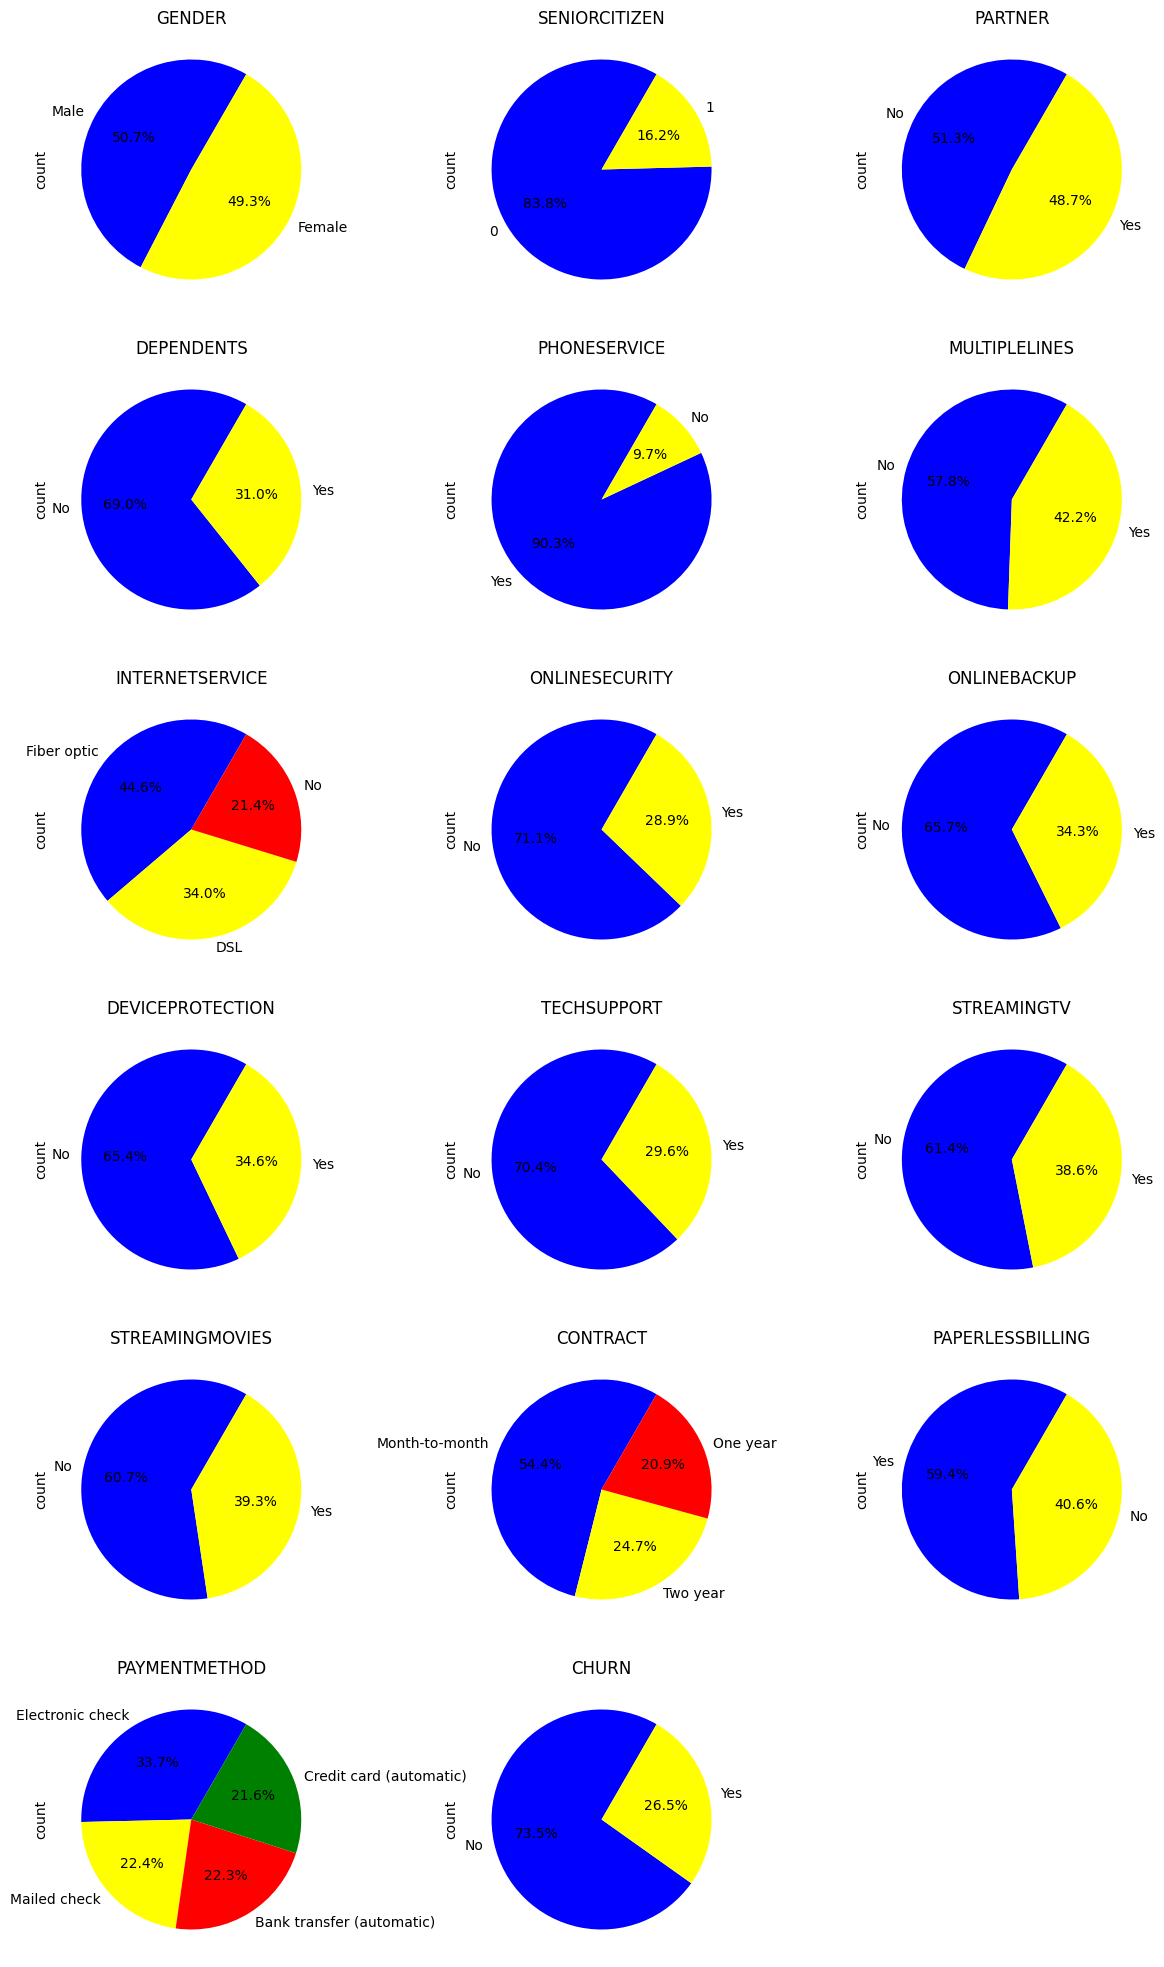

In [264]:
for i, var in enumerate(categorical):
    plt.subplot(round(len(categorical)/3), 3, i+1)
    train[var].value_counts().plot.pie(fontsize=10, figsize=(15,25), autopct="%2.1f%%", startangle=60, colors=['blue','yellow','red','green'])
    #plt.gca().set_aspect('equal')
    plt.title(f'{var.upper()}')

**Key observations**
1. `50.7%` of the customers are male.
2. `16.2%` of the customers are senior citizens.
3. `51.3%` of customers do not have partners.
4. `69.0%` of the customers have dependents.
5. `90.3%` of the customers have a phone service. 
6. Of the customers with a phone service, `57.8%` have Multiple Lines.
7. `78.6%` of the customers have Internet service. `44.6%` of them have Fiber and `34.0%` have a DSL connection.
8. The customers who have internet service, `71.1%` have Online Security, `65.7%` have Online Backup, `65.4%` have Device Protection, `70.4%` have Tech Support, `61.4%` have Movie Tv Streaming and `60.7%` have Movie Streaming.
9. `54.4%` of the customers have month-to-month contracts, while `20.9%` and `24.7%` have One Year and Two Year contracts respectively.
10. `59.4%` of customers use paperless billing.
11. The highest percentage of customer pay via Electronic check at `33.7%`, followed by Mailed Check, Bank transfer and Credit transfer at `22.4%`, `22.3%` and `21.6%` respectively.
12. The proportion of customers recorded to have churned is `26.5%`. The company has a retention of `73.5%`

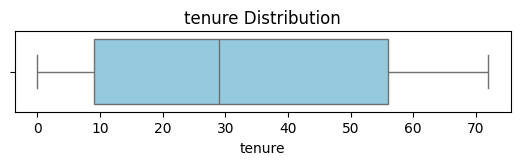

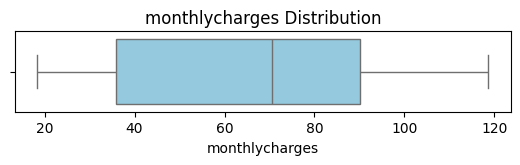

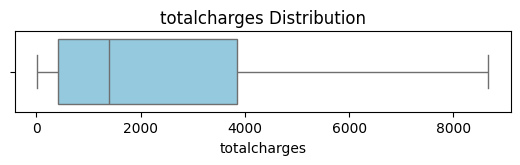

In [265]:
for i, col in enumerate(numeric):
    plt.subplot(4,1,1)
    sns.boxplot(train[col], color='skyblue', orient='h')
    plt.title(f'{col} Distribution')
    plt.show()

**Key Observations**
1. There are no outliers in the numeric columns
2. All numeric columns have some level of skewness and are not normally distributed.


#### Bivariate Analysis

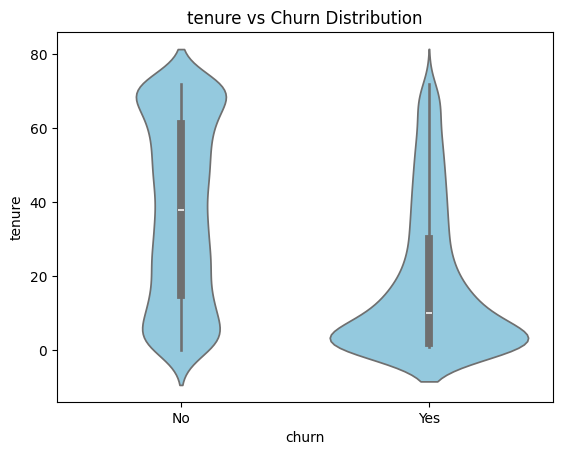

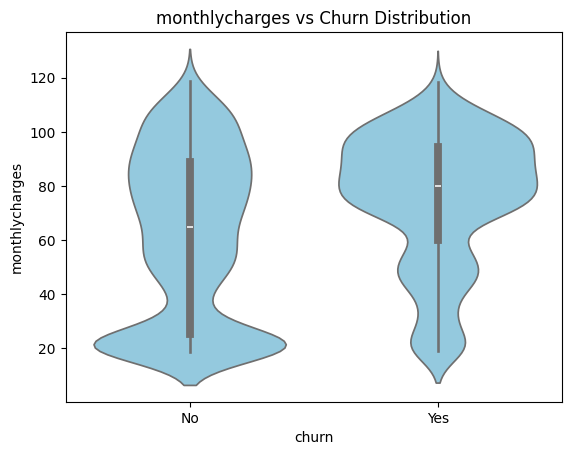

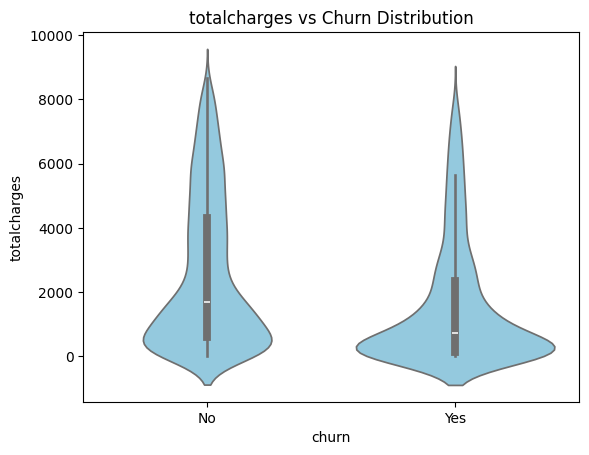

In [266]:
for i, col in enumerate(numeric):
    plt.subplot(1,1,1)
    sns.violinplot(data=train, x='churn', y=col, color='skyblue')
    plt.title(f'{col} vs Churn Distribution')
    plt.show()

**Key Observations** 
1. The majority of the customers who churned were below `20` in tenure, with the median being much lower than that of remaining customers.
2. The median of churned customers in monthly charges is higher than the remaining customers and majority of those who churned are between `60` and `100`.
3. The proportion of customers who churned and those who remain have close Total charges' median values, although those who churned have it a little lower

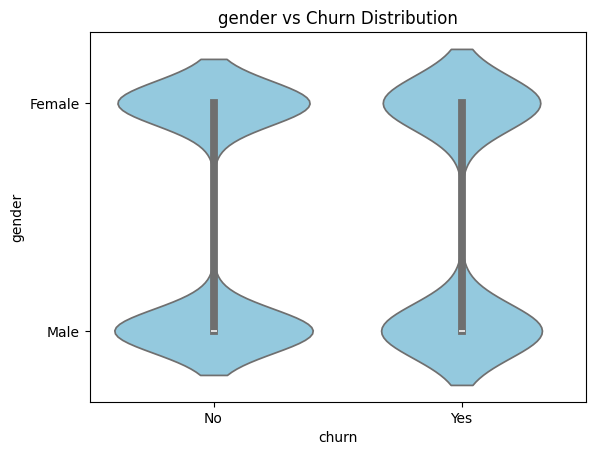

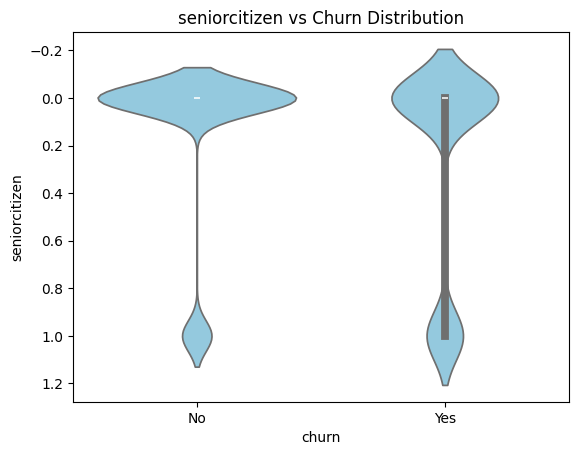

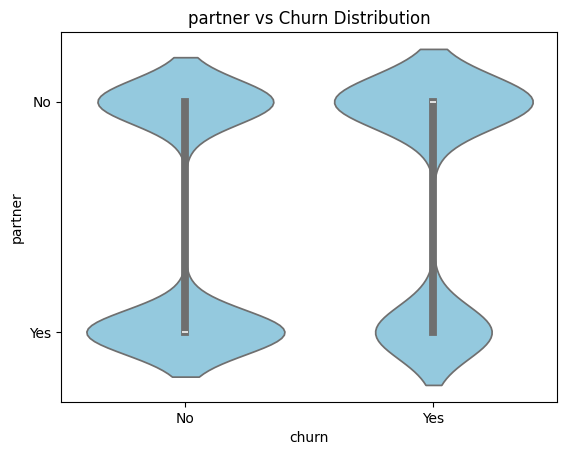

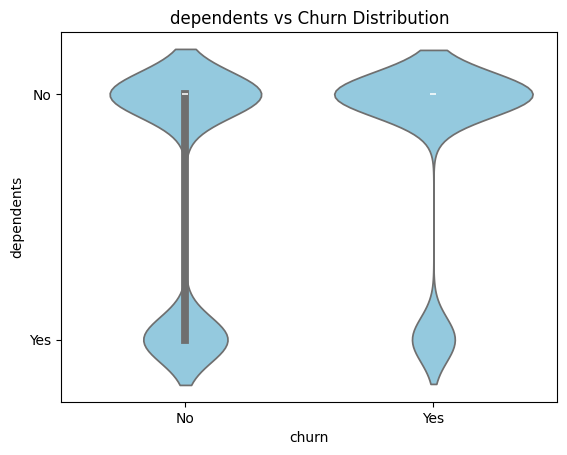

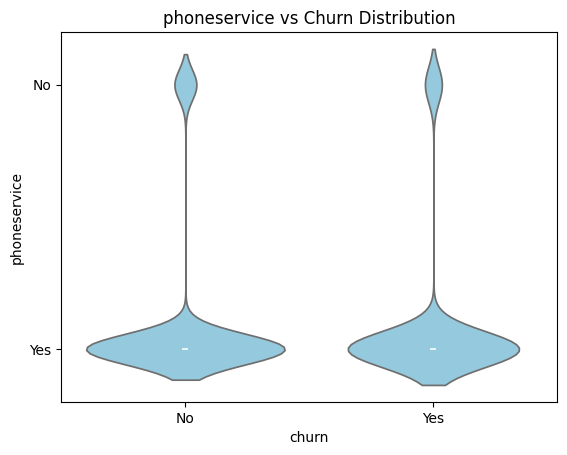

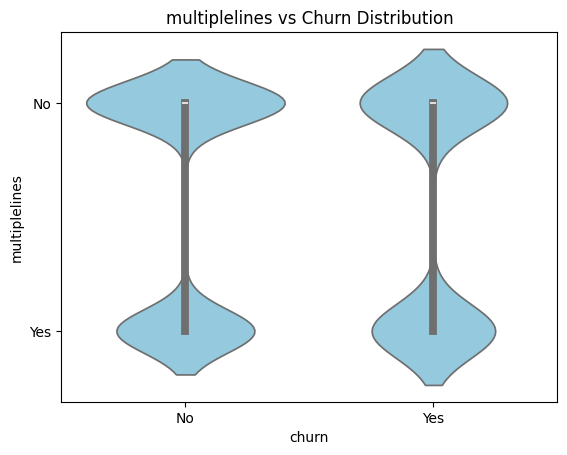

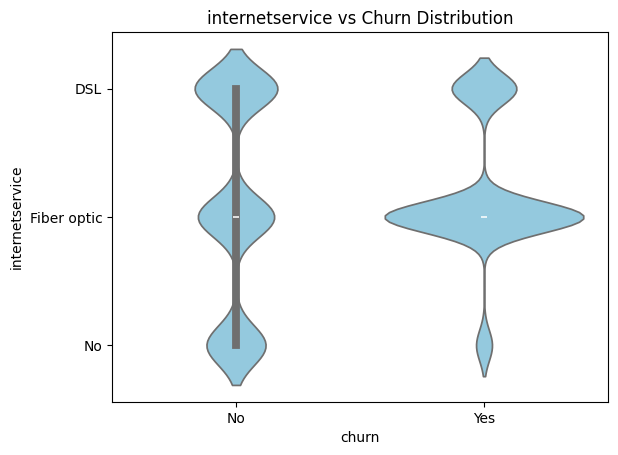

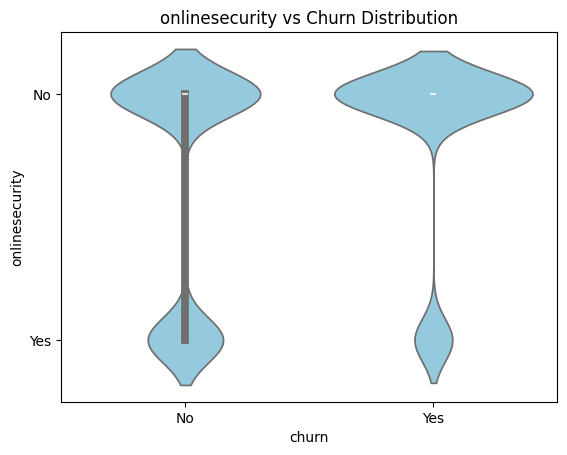

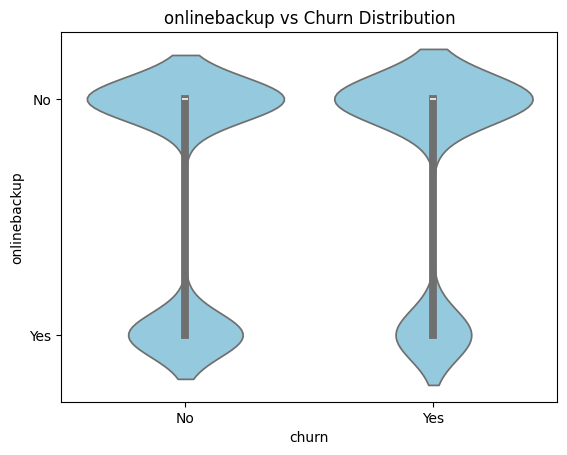

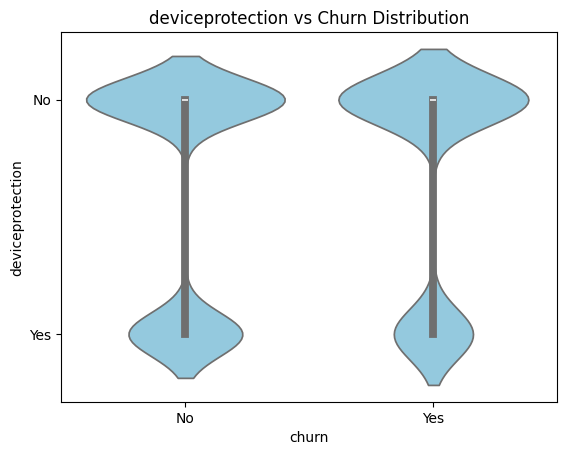

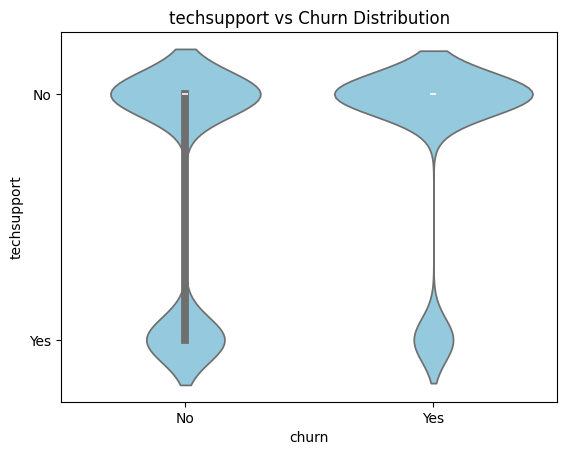

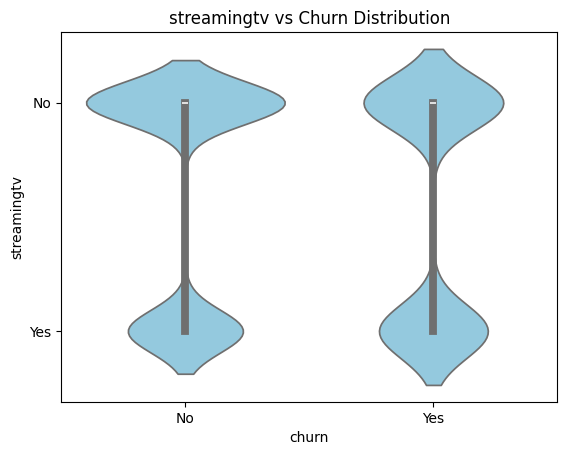

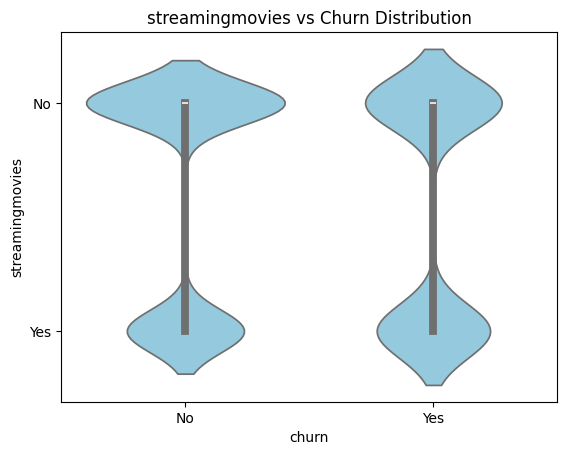

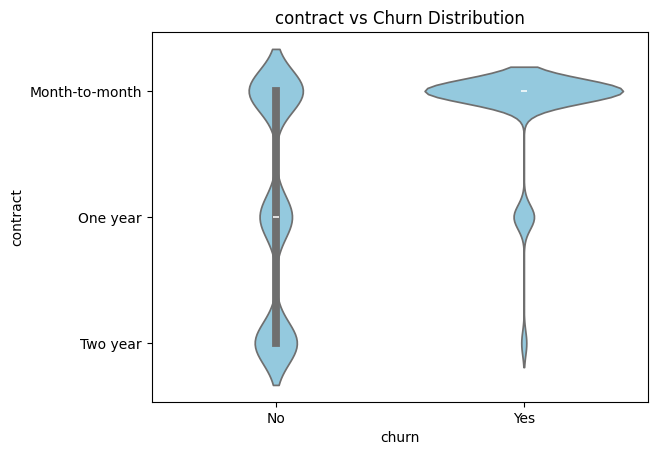

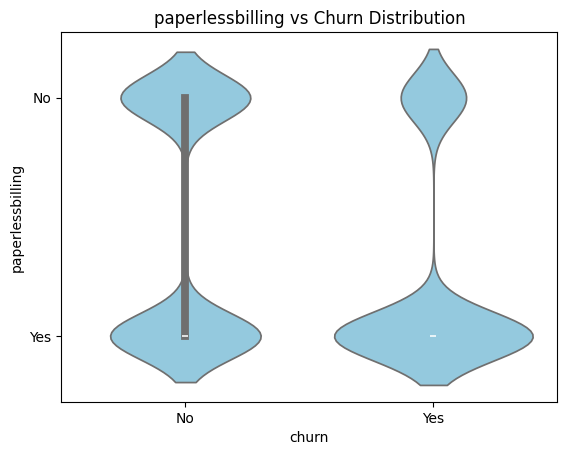

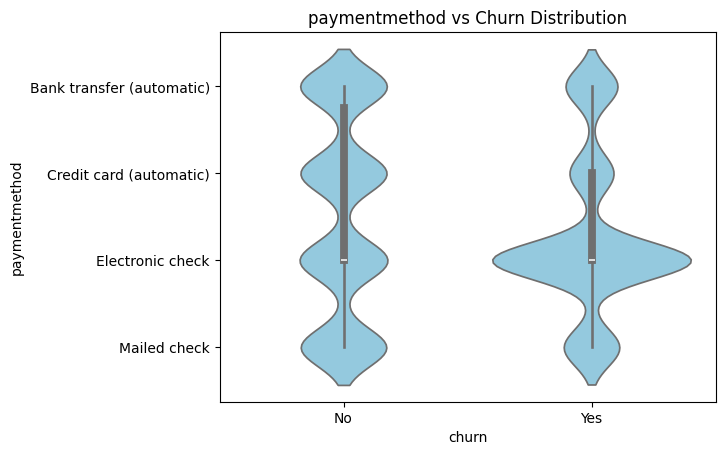

In [267]:
for i, col in enumerate(categorical):
    if col != 'churn':
        plt.subplot(1,1,1)
        sns.violinplot(data=train, x='churn', y=col, color='skyblue')
        plt.title(f'{col} vs Churn Distribution')
        plt.show()

**Observations:**
1. All columns have the median for those who churned and those who have remained in the same category **EXCEPT** for `Partner` and `Contract`. 
2. The median for `Partner` is in the `Yes` for those who remained and in `No` for those who churned.
3. The median for `Contract` is in `One Year` for those who remained and in `Month-to-month` for those who churned.

#### Multivariate Analysis

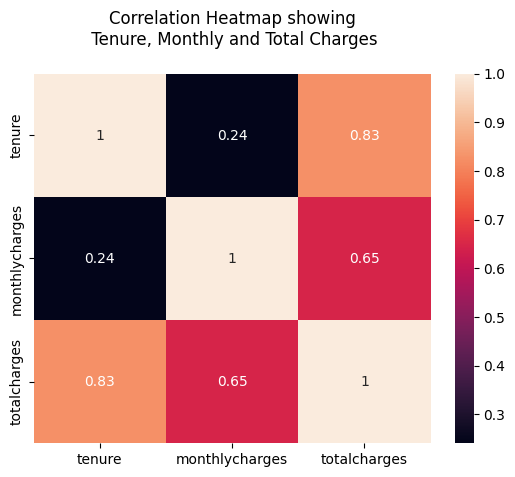

In [268]:
sns.heatmap(data=train[numeric].corr(), xticklabels=True, annot=True )
plt.title('Correlation Heatmap showing\n Tenure, Monthly and Total Charges\n')
plt.show()

**Observations**
1. Tenure is highly correlated with total charges
2. There is very little correlation between monthly charges and tenure
3. There is a moderate correlation between monthly and total charges.

### **ANSWERING ANALYTICAL QUESTIONS**

##### **Question 1:** What are the top 3 features that have strong correlation to churn?

In [269]:
train

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No


In [204]:
#for col in train.columns:
#    if train[col].dtype == 'category':
#        train[col] = pd.factorize(train[col])[0]

In [205]:
train

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.850000,29.850000,0
5575-GNVDE,1,0,1,0,34,1,0,0,1,1,1,0,0,0,1,1,1,56.950001,1889.500000,0
3668-QPYBK,1,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,1,53.849998,108.150002,1
7795-CFOCW,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.299999,1840.750000,0
9237-HQITU,0,0,1,0,2,1,0,1,0,1,0,0,0,0,0,0,0,70.699997,151.649994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1,0,0,1,24,1,1,0,1,1,1,1,1,1,1,0,1,84.800000,1990.500000,0
2234-XADUH,0,0,0,1,72,1,1,1,0,0,1,0,1,1,1,0,3,103.200000,7362.900000,0
4801-JZAZL,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.600000,346.450000,0


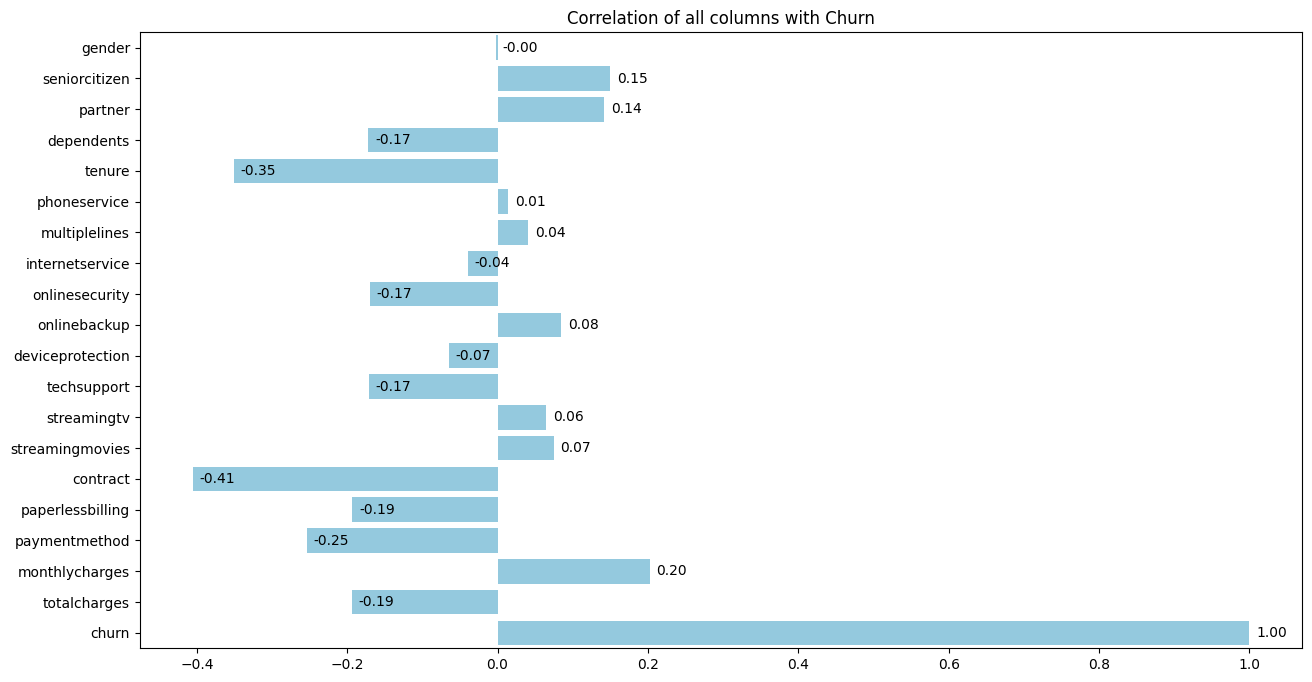

In [206]:
plt.figure(figsize=(15,8))
#colormap = sns.color_palette('crest')
ax = sns.barplot(data=train.corrwith(train['churn']), orient='h', color='skyblue')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.title('Correlation of all columns with Churn')
plt.show()


* There is no column with a particularly strong correlation to churn as they are all below **0.5**.
* However, `Contract`, `tenure` and `paymentmethod` are the ones with the highest **NEGATIVE** correlation with Churn at **`-0.41`**, **`-0.35`** and **`-0.25`** respectively

##### **Question 3:** What was the financial impact of customer churn on Vodafone's revenue?

In [270]:
#Comparing revenue for churned and retained customers
retainedrevenue = (train
                   ['totalcharges']
                   .where(train['churn']== 0)
                   .sum()
                   )
lostrevenue = (train
               ['totalcharges']
               .where(train['churn'] == 1)
               .sum()
               )
churnimpact=[retainedrevenue, lostrevenue]
plt.figure(figsize=(8,8))
plt.pie(colors=['lightgreen','red'], startangle=90, x=churnimpact, explode=[0,0.1], autopct='%2.2f%%', labels=['Retained','Lost'])
plt.title(f'Impact of Customer Churn on Revenue')
plt.show()
print(f'Churned customers accounted for {(lostrevenue/(retainedrevenue + lostrevenue))*100:.2f}% of total revenue')


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 800x800 with 1 Axes>

##### **Question 4:** What are the prevalent contract types among customers exhibiting churn behavior?

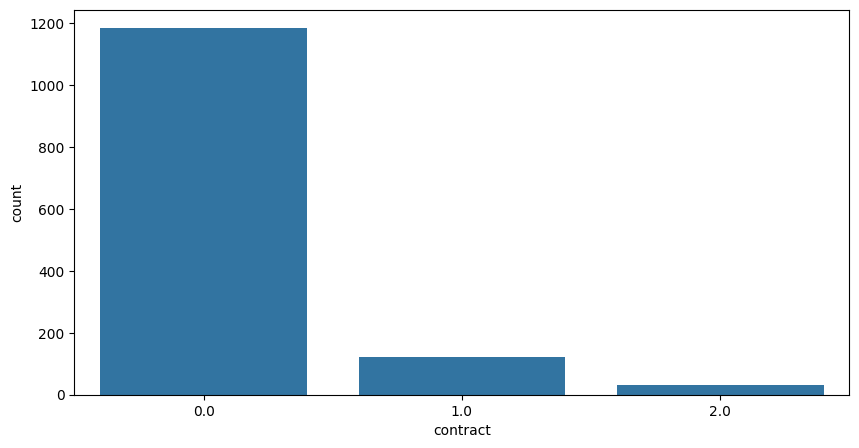

In [208]:
#Checking relationship between churned customers, contract types and payment methods.
plt.figure(figsize=(10,5))
labels={'0':'Month to Month', '1':'One Year', '2':'Two Years'}
sns.barplot(data=(train['contract'].where(train['churn']==1).value_counts()), orient='v')
plt.show()

##### **Question 5:** How does the distribution of tenure differ between churned and retained customers?

In [209]:
#checking distribution of tenure for retained and churned customers
churnedtenure = (train
                 ['tenure']
                 .where(train['churn'] == 1)
                 .value_counts()
                 )
retainedtenure = (train
                 ['tenure']
                 .where(train['churn'] == 0)
                 .value_counts()
                 )
tenurecheck = [churnedtenure, retainedtenure]



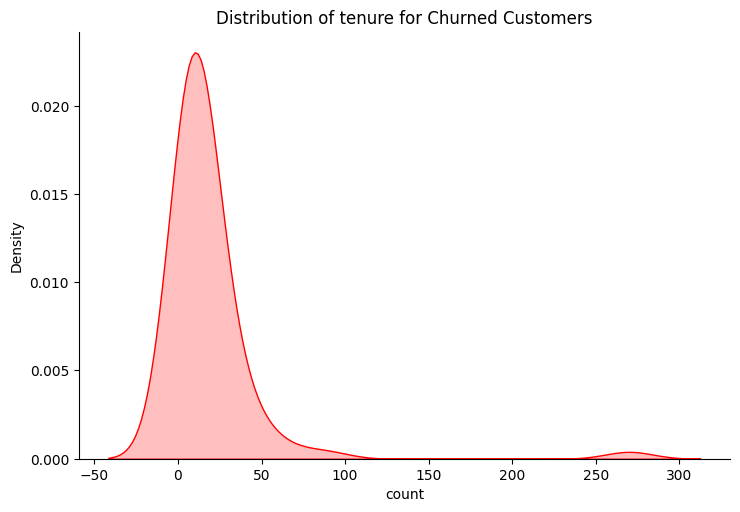

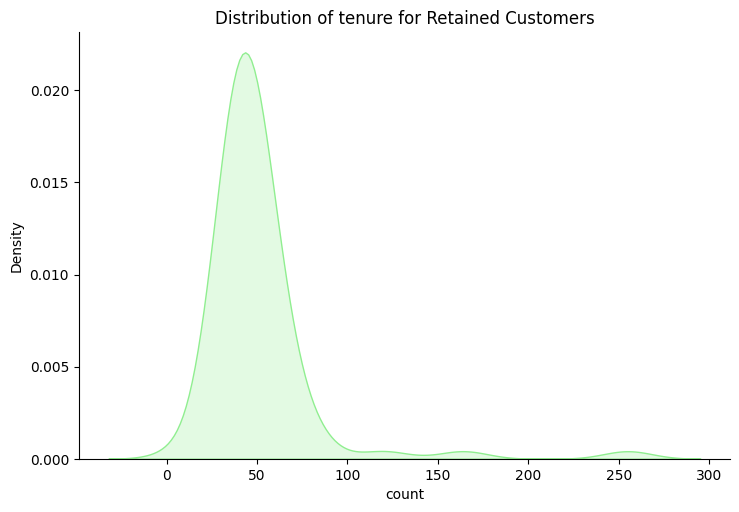

In [210]:
sns.displot(x=tenurecheck[0], kind='kde', fill=True, color='red', height=5, aspect=1.5)
plt.title('Distribution of tenure for Churned Customers')
plt.show()
sns.displot(x=tenurecheck[1], kind='kde', fill=True, color='lightgreen', height=5, aspect=1.5)
plt.title('Distribution of tenure for Retained Customers')
plt.show()

##### **Question 6:** Is there a correlation between churn and specific internet service types (e.g., fiber vs. DSL)?

In [211]:
train['internetservice'].corr(train['churn'])

-0.03964973851717804

* The correlation between internet service and churn is almost negligible.

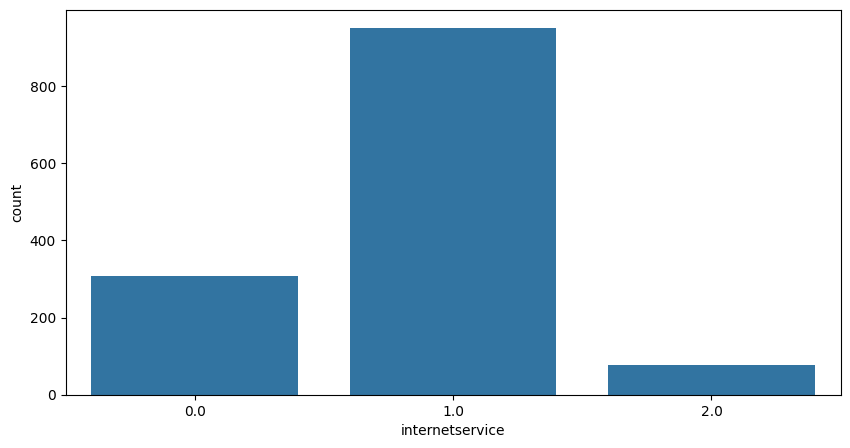

In [212]:
plt.figure(figsize=(10,5))
labels={'0':'DSL', '1':'FIBER', '2':'NO'}
sns.barplot(data = train['internetservice'].where(train['churn']== 1).value_counts()) #checking relationship between different internet connections and churn
plt.show()

##### **Question 7:** How do different payment methods (e.g., electronic check, credit card) correlate with churn?

In [213]:
train['paymentmethod'].corr(train['churn'])

-0.2537549200121391

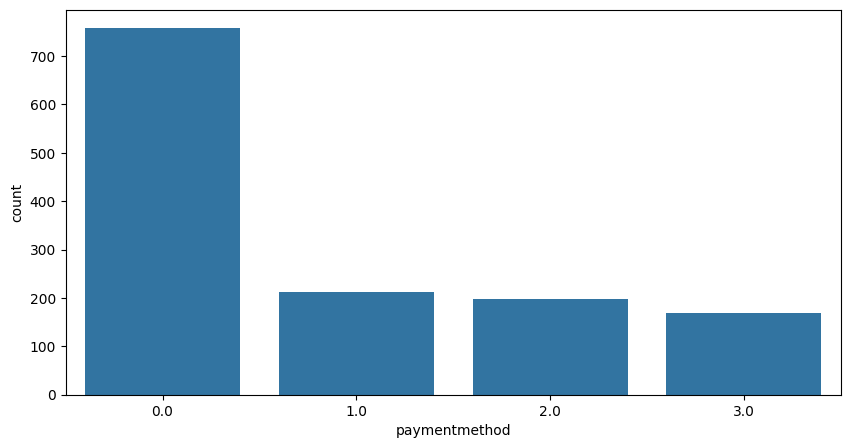

In [214]:
#Checking relationship between churned customers, contract types and payment methods.
plt.figure(figsize=(10,5))
labels={0:'Electronic Check', 1:'Mailed Check', 2:'Bank(auto)', 3:'Credit Card'}
sns.barplot(data=(train['paymentmethod'].where(train['churn']==1).value_counts()), orient='v')
#plt.xlabel(labels)
plt.show()

## **3. FEATURE ENGINEERING**

In [215]:
train.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        3
churn               0
dtype: int64

In [216]:
#adding a feature for demographics.
demographic_cols = ['gender','partner','dependents','seniorcitizen']
train['demographics'] = train[demographic_cols].sum(axis=1)
train['demographics']

customerid
7590-VHVEG    0
5575-GNVDE    2
3668-QPYBK    2
7795-CFOCW    2
9237-HQITU    1
             ..
6840-RESVB    2
2234-XADUH    1
4801-JZAZL    1
8361-LTMKD    2
3186-AJIEK    2
Name: demographics, Length: 5042, dtype: int64

In [217]:
#adding a feature for billing
billing_cols = ['contract','paymentmethod','monthlycharges']
train['billing'] = train[billing_cols].sum(axis=1)
train['billing']

customerid
7590-VHVEG     29.850000
5575-GNVDE     58.950001
3668-QPYBK     54.849998
7795-CFOCW     45.299999
9237-HQITU     70.699997
                 ...    
6840-RESVB     86.800000
2234-XADUH    107.200000
4801-JZAZL     29.600000
8361-LTMKD     75.400000
3186-AJIEK    109.650000
Name: billing, Length: 5042, dtype: float64

In [218]:
#adding a feature for voiceservice
voice_cols = ['phoneservice', 'multiplelines']
train['voice'] = train[voice_cols].sum(axis=1)
train['voice']

customerid
7590-VHVEG    0
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    2
2234-XADUH    2
4801-JZAZL    0
8361-LTMKD    2
3186-AJIEK    1
Name: voice, Length: 5042, dtype: int64

In [219]:
#adding a feature for internet services
net_cols = ['internetservice','internetservice','onlinesecurity','onlinebackup',
            'deviceprotection','techsupport','streamingtv','streamingmovies']
train['netservices'] = train[net_cols].sum(axis=1)
train['netservices']

customerid
7590-VHVEG    0
5575-GNVDE    3
3668-QPYBK    1
7795-CFOCW    4
9237-HQITU    3
             ..
6840-RESVB    6
2234-XADUH    5
4801-JZAZL    2
8361-LTMKD    3
3186-AJIEK    8
Name: netservices, Length: 5042, dtype: int64

In [228]:
train.dtypes

gender                int64
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines         int64
internetservice       int64
onlinesecurity        int64
onlinebackup          int64
deviceprotection      int64
techsupport           int64
streamingtv           int64
streamingmovies       int64
contract              int64
paperlessbilling      int64
paymentmethod         int64
monthlycharges      float64
totalcharges        float64
churn                 int64
demographics          int64
billing             float64
voice                 int64
netservices           int64
dtype: object

##### **Building Pipeline**

In [220]:
# Set up the transformers
# For the numeric variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), # handlie missing values
                                      ("scaler", MinMaxScaler()) # scale numerics
                                     ]
                              )
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [221]:
# For the categorical variables
categorical_pipeline = Pipeline(steps=[("encoder", OneHotEncoder(drop="first", sparse_output=False)),
                                       ("imputer", SimpleImputer(strategy="most_frequent"))
                                      ]
                               )
categorical_pipeline

Pipeline(steps=[('encoder', OneHotEncoder(drop='first', sparse_output=False)),
                ('imputer', SimpleImputer(strategy='most_frequent'))])

In [222]:
# Set up the final preprocessing pipeline
final_preprocessor = ColumnTransformer(transformers=[("numeric", numeric_transformer, numeric),
                                                     ("categorical", categorical_pipeline, categorical)
                                                    ]
                                      )
final_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['tenure', 'monthlycharges', 'totalcharges']),
                                ('categorical',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['gender', 'seniorcitizen', 'partner',
                                  'dependents', 'phoneservice', 'multiplelines',
                                  'internetservice', 'onlinesecurity',
                                  'onlinebackup', 'deviceprotection',
                                  'techsupport', 'streamingtv',
                                  'streamingmovies', 'contract',
                                  'paperlessbilling', 'paymentmethod',
                                  'churn'])])

## **4. MODEL SELECTION AND TRAINING**

In [223]:
#Splitting data
X = train.drop(columns= ['churn'])
y = train['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 2)


In [ ]:
#model selection


##### **1. Logistic Regression**

In [224]:
# Logistic Regression
log_reg = LogisticRegression(random_state=32, n_jobs = -1)
log_reg_model = log_reg.fit(X_train,  y_train)

# Making predictions
log_reg_pred = log_reg_model.predict(X_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

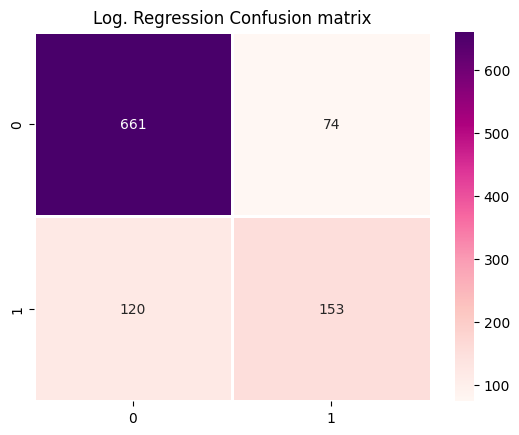

In [135]:
# Defining the Confusion Matrix 
lr_conf_mat = confusion_matrix(y_test, log_reg_pred)
lr_conf_mat = pd.DataFrame(lr_conf_mat).reset_index(drop=True)

# Visualizing the Confusion Matrix
f, ax = plt.subplots()
sns.heatmap(lr_conf_mat, annot=True, linewidth=1.0, fmt=".0f", cmap="RdPu", ax=ax)
plt.xlabel = ("y_pred")
plt.ylabel = ("y_true")
plt.title("Log. Regression Confusion matrix")
plt.show()

In [136]:
# Evaluating the model
log_reg_report = classification_report(y_test, log_reg_pred) #, target_names=["Stayed", "Left"]
print(log_reg_report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       735
           1       0.67      0.56      0.61       273

    accuracy                           0.81      1008
   macro avg       0.76      0.73      0.74      1008
weighted avg       0.80      0.81      0.80      1008



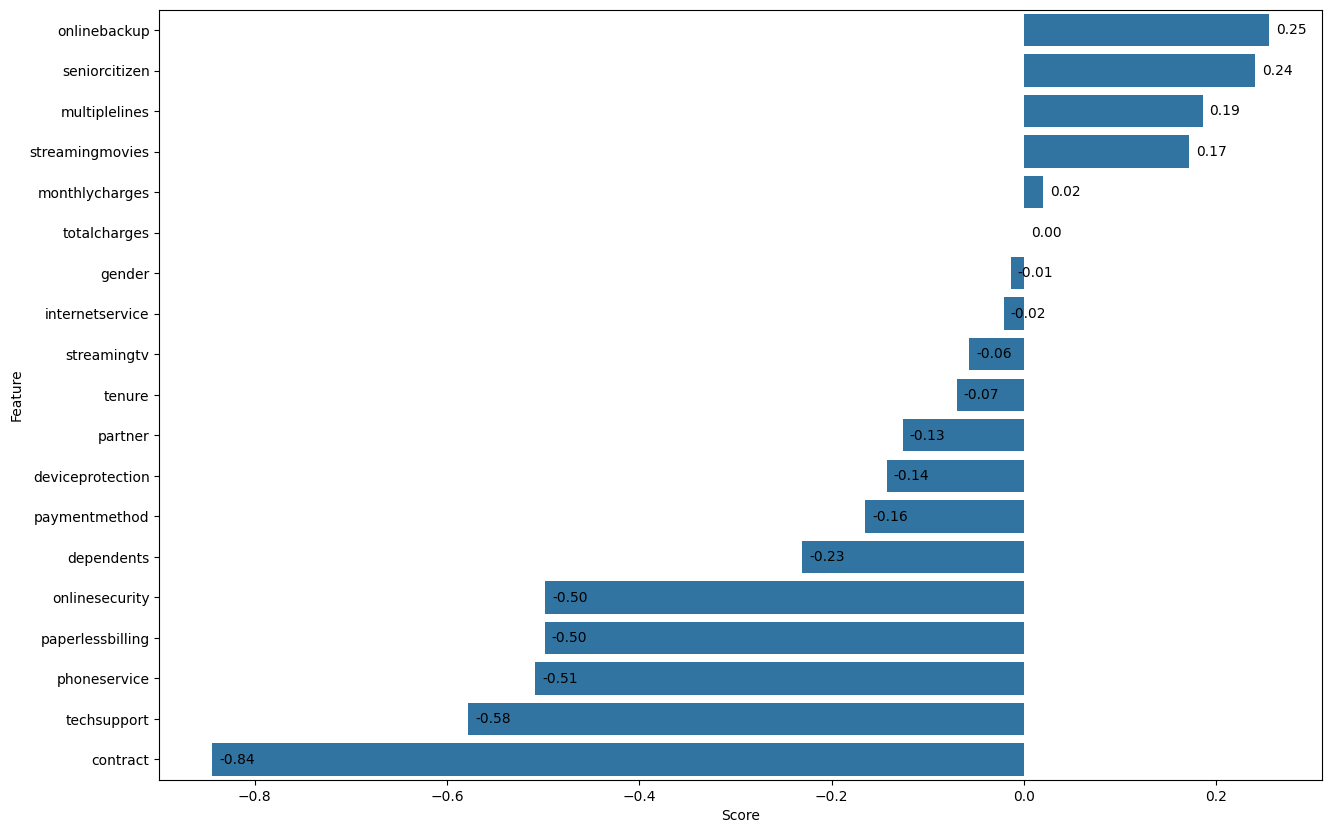

In [137]:
# Feature Importance of the Logistic Regression Model
log_reg_importance = log_reg_model.coef_[0]
log_reg_importance = pd.DataFrame(log_reg_importance, index=X.columns)
log_reg_importance.reset_index(inplace=True)
log_reg_importance.rename(columns={"index": "Feature",0: "Score"}, inplace=True)
log_reg_importance.sort_values(by="Score", ascending=False, inplace=True)

# Visualizing the feature importances
plt.figure(figsize=(15,10))
ax = sns.barplot(log_reg_importance, y="Feature", x="Score")
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show()

##### **2. XGBoost**

In [138]:
# Instantiate the model
model = XGBClassifier(random_state = 25, verbose = False, n_jobs = -1)
xg_model_train = model.fit(X_train, y_train)

#run the prediction
xg_pred = xg_model_train.predict(X_test)

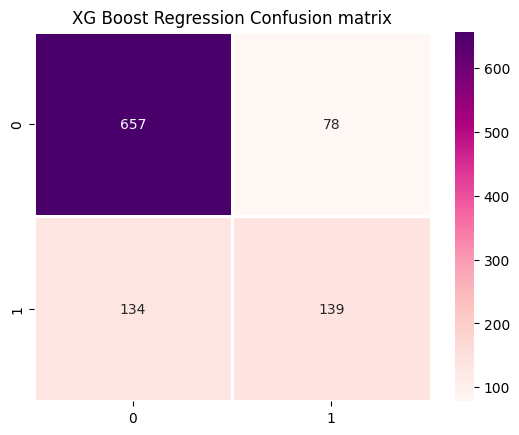

In [139]:
# Defining the Confusion Matrix 
xg_conf_mat = confusion_matrix(y_test, xg_pred)
xg_conf_mat = pd.DataFrame(xg_conf_mat).reset_index(drop=True)

# Visualizing the Confusion Matrix
f, ax = plt.subplots()
sns.heatmap(xg_conf_mat, annot=True, linewidth=1.0, fmt=".0f", cmap="RdPu", ax=ax)
plt.xlabel = ("y_pred")
plt.ylabel = ("y_true")
plt.title("XG Boost Regression Confusion matrix")
plt.show()

In [142]:
# Evaluating the model
xg_reg_report = classification_report(y_test, xg_pred) #, target_names=["Stayed", "Left"]
print(xg_reg_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       735
           1       0.64      0.51      0.57       273

    accuracy                           0.79      1008
   macro avg       0.74      0.70      0.71      1008
weighted avg       0.78      0.79      0.78      1008



## **6. CONCLUSION**